In [2]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import ElasticNetCV

from sklearn.feature_selection import RFECV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats

from scipy.special import inv_boxcox

# Data Preprocessing

Prepare the data for further analysis and modeling

In [65]:
# Read csv file into a pandas dataframe
file_path = r'data\filtered_data_ssa.csv'

df = pd.read_csv(file_path)

print(len(df))
display(df)

38832


,Country Name,Country Code,Series Name,Series Code,1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Angola,AGO,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..,..,..,..,...,46.1,46.7,47.4,47.8,48.3,48.7,49.3,49.7,50,..
1,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,38.3981781,32,42,41.78503418,42.90624237,45.29,45.63388062,46.95544434,48.22385406,..
2,Angola,AGO,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,..,..,..,..,..,..,...,10.00263729,11.89191121,25.50207548,52.83796405,-13.5547861,-30.81806375,5.952710332,-25.97406459,..,..
3,Angola,AGO,Adjusted net national income (constant 2015 US$),NY.ADJ.NNTY.KD,..,..,..,..,..,..,...,64076814037,71696771870,89980936747,137525031756,118883807869,82246120177,87141993470,64507675799,..,..
4,Angola,AGO,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,5331415309,5695287814,5025667935,4945481613,7447022926,6550254439,...,82586459264,97222549045,89980936747,78386338347,88718230842,64167495601,56232452982,36901999783,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38827,Zimbabwe,ZWE,Women Business and the Law Index Score (scale ...,SG.LAW.INDX,52.5,52.5,52.5,55,55,55,...,86.875,86.875,86.875,86.875,86.875,86.875,86.875,86.875,86.875,86.875
38828,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,..,..,..,..,..,53.2,...,59.1,59.4,59.5,59.7,59.9,60.1,60.3,60.5,60.7,..
38829,Zimbabwe,ZWE,Young people (ages 15-24) newly infected with HIV,SH.HIV.INCD.YG,..,..,..,..,..,79000,...,20000,19000,17000,15000,13000,10000,8600,7700,6800,..
38830,Zimbabwe,ZWE,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,..,..,..,..,..,220000,...,58000,53000,49000,44000,39000,32000,27000,25000,23000,..


In [66]:
df_2 = df.copy()

In [67]:
# Drop columns Country Code and Series Code
df_2 = df_2.drop(columns=['Country Code', 'Series Code'])

print(len(df_2))
display(df_2)

38832


,Country Name,Series Name,1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Angola,Access to clean fuels and technologies for coo...,..,..,..,..,..,..,..,..,...,46.1,46.7,47.4,47.8,48.3,48.7,49.3,49.7,50,..
1,Angola,Access to electricity (% of population),..,..,..,..,..,..,..,..,...,38.3981781,32,42,41.78503418,42.90624237,45.29,45.63388062,46.95544434,48.22385406,..
2,Angola,Adjusted net national income (annual % growth),..,..,..,..,..,..,..,..,...,10.00263729,11.89191121,25.50207548,52.83796405,-13.5547861,-30.81806375,5.952710332,-25.97406459,..,..
3,Angola,Adjusted net national income (constant 2015 US$),..,..,..,..,..,..,..,..,...,64076814037,71696771870,89980936747,137525031756,118883807869,82246120177,87141993470,64507675799,..,..
4,Angola,Adjusted net national income (current US$),5331415309,5695287814,5025667935,4945481613,7447022926,6550254439,..,..,...,82586459264,97222549045,89980936747,78386338347,88718230842,64167495601,56232452982,36901999783,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38827,Zimbabwe,Women Business and the Law Index Score (scale ...,52.5,52.5,52.5,55,55,55,55,57.5,...,86.875,86.875,86.875,86.875,86.875,86.875,86.875,86.875,86.875,86.875
38828,Zimbabwe,Women's share of population ages 15+ living wi...,..,..,..,..,..,53.2,53.7,54.2,...,59.1,59.4,59.5,59.7,59.9,60.1,60.3,60.5,60.7,..
38829,Zimbabwe,Young people (ages 15-24) newly infected with HIV,..,..,..,..,..,79000,82000,82000,...,20000,19000,17000,15000,13000,10000,8600,7700,6800,..
38830,Zimbabwe,Adults (ages 15+) and children (ages 0-14) new...,..,..,..,..,..,220000,230000,230000,...,58000,53000,49000,44000,39000,32000,27000,25000,23000,..


In [68]:
# Get all unique values of the Country Name column
unique_countries = df_2['1985 [YR1985]'].unique()
display(unique_countries)

array(['..', '5331415309', '534.7124626', ..., '6.121119284', '264100000',
       '52.5'], dtype=object)

In [69]:
# Get all unique values of the Country Name column
unique_countries = df_2['Country Name'].unique()
display(unique_countries)

array(['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
       'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
       'Togo', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [70]:
# Get data types of all columns
df_2.dtypes

Country Name     object
Series Name      object
1985 [YR1985]    object
1986 [YR1986]    object
1987 [YR1987]    object
1988 [YR1988]    object
1989 [YR1989]    object
1990 [YR1990]    object
1991 [YR1991]    object
1992 [YR1992]    object
1993 [YR1993]    object
1994 [YR1994]    object
1995 [YR1995]    object
1996 [YR1996]    object
1997 [YR1997]    object
1998 [YR1998]    object
1999 [YR1999]    object
2000 [YR2000]    object
2001 [YR2001]    object
2002 [YR2002]    object
2003 [YR2003]    object
2004 [YR2004]    object
2005 [YR2005]    object
2006 [YR2006]    object
2007 [YR2007]    object
2008 [YR2008]    object
2009 [YR2009]    object
2010 [YR2010]    object
2011 [YR2011]    object
2012 [YR2012]    object
2013 [YR2013]    object
2014 [YR2014]    object
2015 [YR2015]    object
2016 [YR2016]    object
2017 [YR2017]    object
2018 [YR2018]    object
2019 [YR2019]    object
2020 [YR2020]    object
2021 [YR2021]    object
2022 [YR2022]    object
dtype: object

In [71]:
# Replace ".." with NaN in specific columns
df_2[df_2.columns[2:]] = df_2[df_2.columns[2:]].replace('..', np.nan)

# print(len(df_2))
# display(df_2)

# Convert all columns to float except Country Name and Series Name
df_2[df_2.columns[2:]] = df_2[df_2.columns[2:]].astype(float)

display(df_2.dtypes)

Country Name      object
Series Name       object
1985 [YR1985]    float64
1986 [YR1986]    float64
1987 [YR1987]    float64
1988 [YR1988]    float64
1989 [YR1989]    float64
1990 [YR1990]    float64
1991 [YR1991]    float64
1992 [YR1992]    float64
1993 [YR1993]    float64
1994 [YR1994]    float64
1995 [YR1995]    float64
1996 [YR1996]    float64
1997 [YR1997]    float64
1998 [YR1998]    float64
1999 [YR1999]    float64
2000 [YR2000]    float64
2001 [YR2001]    float64
2002 [YR2002]    float64
2003 [YR2003]    float64
2004 [YR2004]    float64
2005 [YR2005]    float64
2006 [YR2006]    float64
2007 [YR2007]    float64
2008 [YR2008]    float64
2009 [YR2009]    float64
2010 [YR2010]    float64
2011 [YR2011]    float64
2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]    float64
2020 [YR2020]    float64
2021 [YR2021]    float64
2022 [YR2022]    float64


In [72]:
print(len(df_2))
display(df_2)

38832


,Country Name,Series Name,1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Angola,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.610000e+01,4.670000e+01,4.740000e+01,4.780000e+01,4.830000e+01,4.870000e+01,4.930000e+01,4.970000e+01,50.000000,NaN
1,Angola,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.839818e+01,3.200000e+01,4.200000e+01,4.178503e+01,4.290624e+01,4.529000e+01,4.563388e+01,4.695544e+01,48.223854,NaN
2,Angola,Adjusted net national income (annual % growth),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000264e+01,1.189191e+01,2.550208e+01,5.283796e+01,-1.355479e+01,-3.081806e+01,5.952710e+00,-2.597406e+01,NaN,NaN
3,Angola,Adjusted net national income (constant 2015 US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.407681e+10,7.169677e+10,8.998094e+10,1.375250e+11,1.188838e+11,8.224612e+10,8.714199e+10,6.450768e+10,NaN,NaN
4,Angola,Adjusted net national income (current US$),5.331415e+09,5.695288e+09,5.025668e+09,4.945482e+09,7.447023e+09,6.550254e+09,NaN,NaN,...,8.258646e+10,9.722255e+10,8.998094e+10,7.838634e+10,8.871823e+10,6.416750e+10,5.623245e+10,3.690200e+10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38827,Zimbabwe,Women Business and the Law Index Score (scale ...,5.250000e+01,5.250000e+01,5.250000e+01,5.500000e+01,5.500000e+01,5.500000e+01,55.0,57.5,...,8.687500e+01,8.687500e+01,8.687500e+01,8.687500e+01,8.687500e+01,8.687500e+01,8.687500e+01,8.687500e+01,86.875000,86.875
38828,Zimbabwe,Women's share of population ages 15+ living wi...,NaN,NaN,NaN,NaN,NaN,5.320000e+01,53.7,54.2,...,5.910000e+01,5.940000e+01,5.950000e+01,5.970000e+01,5.990000e+01,6.010000e+01,6.030000e+01,6.050000e+01,60.700000,NaN
38829,Zimbabwe,Young people (ages 15-24) newly infected with HIV,NaN,NaN,NaN,NaN,NaN,7.900000e+04,82000.0,82000.0,...,2.000000e+04,1.900000e+04,1.700000e+04,1.500000e+04,1.300000e+04,1.000000e+04,8.600000e+03,7.700000e+03,6800.000000,NaN
38830,Zimbabwe,Adults (ages 15+) and children (ages 0-14) new...,NaN,NaN,NaN,NaN,NaN,2.200000e+05,230000.0,230000.0,...,5.800000e+04,5.300000e+04,4.900000e+04,4.400000e+04,3.900000e+04,3.200000e+04,2.700000e+04,2.500000e+04,23000.000000,NaN


In [73]:
df_3 = df_2.copy()

In [74]:
# Reshape df_3 into the desired format
df_3 = df_3.melt(id_vars=['Country Name', 'Series Name'], var_name='Year', value_name='Value')

# Rename columns
df_3 = df_3.rename(columns={'Country Name': 'Country_Name', 'Series Name': 'Predictor_Name'})

# Extract the year as an integer
df_3['Year'] = df_3['Year'].str.extract('(\d+)').astype(float)

# Pivot the DataFrame to obtain the desired format
df_3 = df_3.pivot(index=['Year', 'Country_Name'], columns='Predictor_Name', values='Value').reset_index()
df_3.columns.name = None

In [75]:
print(len(df_3))
display(df_3)

1824


,Year,Country_Name,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adjusted net national income (annual % growth),Adjusted net national income (constant 2015 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2015 US$),Adjusted net national income per capita (current US$),...,Voice and Accountability: Estimate,Voice and Accountability: Number of Sources,Voice and Accountability: Percentile Rank,"Voice and Accountability: Percentile Rank, Lower Bound of 90% Confidence Interval","Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval",Voice and Accountability: Standard Error,"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Women Business and the Law Index Score (scale 1-100),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,1985.0,Angola,NaN,NaN,NaN,NaN,5.331415e+09,NaN,NaN,534.712463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.125,NaN,NaN
1,1985.0,Benin,NaN,NaN,9.591960,2.974249e+09,8.757094e+08,6.455577,672.975225,198.144388,...,NaN,NaN,NaN,NaN,NaN,NaN,32.662431,40.000,NaN,NaN
2,1985.0,Botswana,NaN,NaN,30.588366,1.705896e+09,8.854750e+08,26.054545,1498.103025,777.616476,...,NaN,NaN,NaN,NaN,NaN,NaN,33.580019,22.500,NaN,NaN
3,1985.0,Burkina Faso,NaN,NaN,1.191345,2.542832e+09,1.441364e+09,-1.696441,318.683219,180.640538,...,NaN,NaN,NaN,NaN,NaN,NaN,9.067931,48.125,NaN,NaN
4,1985.0,Burundi,NaN,NaN,NaN,NaN,8.835330e+08,NaN,NaN,178.562792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,2022.0,Tanzania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.250,NaN,NaN
1820,2022.0,Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.875,NaN,NaN
1821,2022.0,Uganda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.250,NaN,NaN
1822,2022.0,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.250,NaN,NaN


In [76]:
display(df_3[['Year', 'Country_Name', 'Adjusted net national income (current US$)']])

,Year,Country_Name,Adjusted net national income (current US$)
0,1985.0,Angola,5.331415e+09
1,1985.0,Benin,8.757094e+08
2,1985.0,Botswana,8.854750e+08
3,1985.0,Burkina Faso,1.441364e+09
4,1985.0,Burundi,8.835330e+08
...,...,...,...
1819,2022.0,Tanzania,NaN
1820,2022.0,Togo,NaN
1821,2022.0,Uganda,NaN
1822,2022.0,Zambia,NaN


In [77]:
# Calculate the percentage of missing values for the specified column
column_name = 'Life expectancy at birth, total (years)'
missing_percentage = (df_3[column_name].isnull().mean() * 100).round(2)

print(f"Percentage of missing values for '{column_name}': {missing_percentage}%")

column_name_2 = 'GDP per capita (current US$)'
missing_percentage_2 = (df_3[column_name_2].isnull().mean() * 100).round(2)

print(f"Percentage of missing values for '{column_name_2}': {missing_percentage_2}%")

Percentage of missing values for 'Life expectancy at birth, total (years)': 2.63%
Percentage of missing values for 'GDP per capita (current US$)': 6.09%


In [78]:
df_4 = df_3.copy()

In [79]:
# Calculate the percentage of missing values for each column
missing_percentage = (df_4.isnull().mean() * 100).round(2)

display(missing_percentage)

Year                                                                                                 0.00
Country_Name                                                                                         0.00
Access to clean fuels and technologies for cooking (% of population)                                42.11
Access to electricity (% of population)                                                             31.96
Adjusted net national income (annual % growth)                                                      39.53
                                                                                                    ...  
Voice and Accountability: Standard Error                                                            40.13
Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)    21.77
Women Business and the Law Index Score (scale 1-100)                                                 0.00
Women's share of population ages 15+ living wi

In [80]:
# Drop columns with over 50% missing values
threshold = 35
columns_to_drop = missing_percentage[missing_percentage > threshold].index
print(len(columns_to_drop))

df_4 = df_4.drop(columns=columns_to_drop)

print(len(df_4))
display(df_4)

313
1824


,Year,Country_Name,Access to electricity (% of population),Adjusted net national income (current US$),Adjusted net national income per capita (current US$),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),...,"Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Urban population (% of total population),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)","Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Women Business and the Law Index Score (scale 1-100),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,1985.0,Angola,NaN,5.331415e+09,534.712463,4.386602e+07,8.660599,579304255.6,4.80000,3.210702e+08,...,NaN,NaN,3024887.0,30.338,7.890389,NaN,NaN,33.125,NaN,NaN
1,1985.0,Benin,NaN,8.757094e+08,198.144388,6.946023e+06,6.989129,71597526.6,3.29957,3.380122e+07,...,NaN,NaN,1361045.0,30.796,5.236096,11338989.7,32.662431,40.000,NaN,NaN
2,1985.0,Botswana,NaN,8.854750e+08,777.616476,1.081253e+07,11.425374,116346525.3,5.10000,5.193417e+07,...,NaN,NaN,304307.0,26.724,13.706649,NaN,33.580019,22.500,NaN,NaN
3,1985.0,Burkina Faso,NaN,1.441364e+09,180.640538,4.448192e+06,6.711609,103814703.5,1.70000,2.629548e+07,...,NaN,NaN,984153.0,12.334,9.514762,10176861.3,9.067931,48.125,NaN,NaN
4,1985.0,Burundi,NaN,8.835330e+08,178.562792,2.155662e+06,15.894409,179861782.3,2.30000,2.602689e+07,...,NaN,NaN,258336.0,5.221,5.827797,14541982.4,NaN,47.500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,2022.0,Tanzania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.337,4.261,24025884.0,36.682,4.963155,NaN,NaN,81.250,NaN,NaN
1820,2022.0,Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.345,9.814,3886437.0,43.921,3.621041,NaN,NaN,81.875,NaN,NaN
1821,2022.0,Uganda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.226,6.578,12360019.0,26.159,5.342485,NaN,NaN,81.250,NaN,NaN
1822,2022.0,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.195,11.033,9160288.0,45.761,4.009238,NaN,NaN,81.250,NaN,NaN


# Modeling - GDP

In [81]:
df_5 = df_4.copy()

In [82]:
df_5 = df_5.drop(columns=['Year', 'Country_Name'])

# Impute missing values with the mean
mean_values = df_5.mean()
df_5 = df_5.fillna(mean_values)

print(len(df_5))
display(df_5)

1824


,Access to electricity (% of population),Adjusted net national income (current US$),Adjusted net national income per capita (current US$),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),Adjusted savings: energy depletion (% of GNI),Adjusted savings: energy depletion (current US$),...,"Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Urban population (% of total population),Urban population growth (annual %),"Use of IMF credit (DOD, current US$)","Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Women Business and the Law Index Score (scale 1-100),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,36.688685,5.331415e+09,534.712463,4.386602e+07,8.660599,5.793043e+08,4.800000,3.210702e+08,10.858942,7.263507e+08,...,14.014098,14.74657,3024887.0,30.338,7.890389,3.386295e+08,35.605927,33.125,57.644348,11177.627841
1,36.688685,8.757094e+08,198.144388,6.946023e+06,6.989129,7.159753e+07,3.299570,3.380122e+07,2.063293,2.113663e+07,...,14.014098,14.74657,1361045.0,30.796,5.236096,1.133899e+07,32.662431,40.000,57.644348,11177.627841
2,36.688685,8.854750e+08,777.616476,1.081253e+07,11.425374,1.163465e+08,5.100000,5.193417e+07,0.575726,5.862718e+06,...,14.014098,14.74657,304307.0,26.724,13.706649,3.386295e+08,33.580019,22.500,57.644348,11177.627841
3,36.688685,1.441364e+09,180.640538,4.448192e+06,6.711609,1.038147e+08,1.700000,2.629548e+07,0.000000,0.000000e+00,...,14.014098,14.74657,984153.0,12.334,9.514762,1.017686e+07,9.067931,48.125,57.644348,11177.627841
4,36.688685,8.835330e+08,178.562792,2.155662e+06,15.894409,1.798618e+08,2.300000,2.602689e+07,0.000000,0.000000e+00,...,14.014098,14.74657,258336.0,5.221,5.827797,1.454198e+07,35.605927,47.500,57.644348,11177.627841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,36.688685,1.539988e+10,1154.938774,3.134758e+08,10.705433,2.096959e+09,3.615221,6.655497e+08,2.949010,7.305947e+08,...,3.337000,4.26100,24025884.0,36.682,4.963155,3.386295e+08,35.605927,81.250,57.644348,11177.627841
1820,36.688685,1.539988e+10,1154.938774,3.134758e+08,10.705433,2.096959e+09,3.615221,6.655497e+08,2.949010,7.305947e+08,...,12.345000,9.81400,3886437.0,43.921,3.621041,3.386295e+08,35.605927,81.875,57.644348,11177.627841
1821,36.688685,1.539988e+10,1154.938774,3.134758e+08,10.705433,2.096959e+09,3.615221,6.655497e+08,2.949010,7.305947e+08,...,6.226000,6.57800,12360019.0,26.159,5.342485,3.386295e+08,35.605927,81.250,57.644348,11177.627841
1822,36.688685,1.539988e+10,1154.938774,3.134758e+08,10.705433,2.096959e+09,3.615221,6.655497e+08,2.949010,7.305947e+08,...,12.195000,11.03300,9160288.0,45.761,4.009238,3.386295e+08,35.605927,81.250,57.644348,11177.627841


In [83]:
df_6 = df_5.copy()

In [84]:
# Drop features related to the target variable (life expectancy)
df_6 = df_6.drop(columns=['Life expectancy at birth, female (years)',
                          'Life expectancy at birth, male (years)',
                          'Life expectancy at birth, total (years)',
                          'GDP per capita growth (annual %)',
                          'GDP per capita (constant 2015 US$)',
                          'GDP per capita (constant LCU)',
                          'GDP per capita (current LCU)',
                          'GDP per capita, PPP (constant 2017 international $)',
                          'GDP per capita, PPP (current international $)'])

In [85]:
# Split predictors and target variable
X = df_6.drop('GDP per capita (current US$)', axis=1)
y = df_6['GDP per capita (current US$)']

In [86]:
# Calcule the correlation matrix
correlation_matrix = X.corr()

# Identify pairs of features with high correlation
high_corr_threshold = 0.90
highly_correlated_pairs = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname = correlation_matrix.columns[i]
            rowname = correlation_matrix.columns[j]
            highly_correlated_pairs[(colname, rowname)] = correlation_matrix.iloc[i, j]

display(highly_correlated_pairs)


In [87]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(len(vif_data))
display(vif_data)


In [88]:
# Filter out features with VIF greater than 10
features_to_keep = vif_data[vif_data['VIF'] <= 10]['feature']

print(len(features_to_keep))
display(features_to_keep)

features_to_keep_list = list(features_to_keep)

In [90]:
X_filtered_data = X[features_to_keep]

print(len(X_filtered_data))
display(X_filtered_data)

1824


,Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: education expenditure (% of GNI),"Agriculture, forestry, and fishing, value added (annual % growth)",Broad money to total reserves ratio,CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (% of total),Claims on central government (annual growth as % of broad money),"Claims on central government, etc. (% GDP)",Claims on private sector (annual growth as % of broad money),Consumer price index (2010 = 100),...,Price level ratio of PPP conversion factor (GDP) to market exchange rate,"Public and publicly guaranteed debt service (% of exports of goods, services and primary income)",Refugee population by country or territory of asylum,Refugee population by country or territory of origin,"Reserves and related items (BoP, current US$)","Services, value added (annual % growth)","Short-term debt (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Short-term debt (% of total reserves),Total reserves (% of total external debt)
0,8.660599,4.800000,3.169093,18.963487,0.342514,41.731669,14.680682,7.644718,9.716060,201.176115,...,0.415397,10.105836,91520.0,317392.000000,-6.000000e+06,4.353417,39.934372,9.38927,2485.177929,50.139548
1,6.989129,3.299570,9.322651,18.963487,0.342514,79.802956,-8.170629,1.170306,25.569301,201.176115,...,0.415397,12.053387,3700.0,107993.417488,-2.945114e+07,5.931458,42.625387,16.15140,2485.177929,50.139548
2,11.425374,5.100000,4.457487,0.386330,0.342514,0.000000,-71.961831,-28.931375,-6.110223,9.993718,...,0.415397,5.316508,5680.0,107993.417488,2.542694e+08,23.977742,0.225023,0.57850,0.263731,219.389345
3,6.711609,1.700000,7.201730,18.963487,0.342514,100.000000,-12.386625,-2.543264,18.171117,50.251202,...,0.415397,10.105836,90.0,90.000000,-2.467494e+06,9.077329,39.934372,8.75700,2485.177929,50.139548
4,15.894409,2.300000,13.128546,4.685682,0.342514,93.650794,12.679307,11.111023,1.637624,7.711640,...,0.415397,16.489916,267440.0,199810.000000,1.585370e+07,4.353417,24.608097,6.94070,89.982026,7.713512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,10.705433,3.615221,3.300000,18.963487,0.342514,79.561632,14.680682,7.644718,9.716060,209.475524,...,0.385033,10.105836,206229.0,786.000000,-2.467494e+06,5.529122,39.934372,9.38927,2485.177929,50.139548
1820,10.705433,3.615221,4.998770,18.963487,0.342514,79.561632,7.828891,3.665516,8.472949,129.610337,...,0.352148,10.105836,9300.0,7853.000000,-2.467494e+06,6.219280,39.934372,9.38927,2485.177929,50.139548
1821,10.705433,3.615221,4.355626,18.963487,0.342514,79.561632,18.411866,9.036366,6.242007,199.268589,...,0.357940,10.105836,1463523.0,7510.000000,-2.467494e+06,4.089280,39.934372,9.38927,2485.177929,50.139548
1822,10.705433,3.615221,-2.426138,2.665921,0.342514,79.561632,-16.579190,9.276462,11.977564,332.778677,...,0.382072,10.105836,61159.0,295.000000,-1.329785e+09,9.854002,39.934372,9.38927,2485.177929,50.139548


# Split and Normalize the data

In [91]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_filtered_data, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((1459, 61), (365, 61), (1459,), (365,))

In [92]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

display(X_train_scaled_df)

,Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: education expenditure (% of GNI),"Agriculture, forestry, and fishing, value added (annual % growth)",Broad money to total reserves ratio,CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (% of total),Claims on central government (annual growth as % of broad money),"Claims on central government, etc. (% GDP)",Claims on private sector (annual growth as % of broad money),Consumer price index (2010 = 100),...,Price level ratio of PPP conversion factor (GDP) to market exchange rate,"Public and publicly guaranteed debt service (% of exports of goods, services and primary income)",Refugee population by country or territory of asylum,Refugee population by country or territory of origin,"Reserves and related items (BoP, current US$)","Services, value added (annual % growth)","Short-term debt (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Short-term debt (% of total reserves),Total reserves (% of total external debt)
0,0.568125,-0.220186,0.169517,-0.135288,-0.613444,0.026350,-0.121541,-0.345696,0.073473,-0.122191,...,-0.935550,-0.443352,2.921825,-0.445219,0.431438,0.478825,-0.034579,0.051685,-0.125851,-0.235081
1,-0.399011,-0.632231,0.613573,0.345161,-0.337537,0.785300,-0.032581,5.026477,-0.289604,0.035998,...,-1.312727,0.003175,-0.544191,0.359675,0.018700,0.000282,-0.011554,-0.779625,-0.124152,-0.405073
2,-0.184856,-0.299426,-0.131456,-0.131146,-0.004615,0.222536,-0.269090,0.006059,-0.044815,-0.183299,...,-0.007957,0.547530,2.611846,-0.447607,0.074761,-0.223940,-0.167586,-0.627181,-0.126511,-0.330733
3,0.974888,-0.061708,-0.119008,-0.136984,-0.889575,0.631797,-0.071231,-0.212414,0.332401,-0.172569,...,-0.185576,1.573816,0.799769,0.485535,0.050037,0.000282,-0.193206,-0.873650,-0.127748,-0.292742
4,-0.694137,-0.486204,0.190767,-0.086695,-0.665129,0.798717,-0.099960,-0.218184,-0.159720,-0.097682,...,-0.247318,-0.631293,0.351651,1.299376,0.084208,0.332456,0.086063,2.545898,-0.103169,-0.369578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.183555,0.121190,0.041901,-0.117133,-0.665378,-0.104217,0.433605,0.006571,0.984660,-0.090746,...,0.054881,-0.573327,-0.546454,-0.447198,-0.059108,0.719403,-0.206956,-0.109925,-0.126508,-0.200482
1455,1.122703,-0.367758,0.499232,-0.132483,-0.596060,-0.437704,-0.107158,-0.018690,0.141454,-0.068145,...,0.761401,-0.766501,-0.336631,-0.446652,0.115877,0.239655,-0.222869,0.126598,-0.127043,-0.008568
1456,-1.413116,0.013004,-0.317224,-0.000671,0.126204,-0.624665,-0.138869,-0.304462,-0.368851,-0.097434,...,-0.771045,-0.787893,-0.505348,-0.404120,0.047457,-1.555529,-0.031216,0.324128,0.000049,0.021774
1457,-0.237242,0.225004,-0.126941,-0.130329,-0.190374,0.037452,-0.104467,0.091519,0.268946,0.015627,...,-0.661195,-0.375165,-0.479487,-0.351945,-0.052801,-0.216889,-0.136702,0.757078,-0.125246,-0.172719


# Random Forest - GDP

In [33]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # You can expand this list
    'max_depth': [None, 10, 20, 30],  # Include None for unlimited depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor object
random_forest_regressor = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object with cross-validation
grid_search_rf = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search_rf.best_params_
print("Best parameters:", best_params)



Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

In [ ]:
# Create a RandomForestRegressor model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# best_rf_model = RandomForestRegressor(
#                                     max_depth = None, 
#                                     min_samples_leaf = 2, 
#                                     min_samples_split = 2, 
#                                     n_estimators = 300, 
#                                     random_state=42)

# Fit the best model to the training data
best_rf_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred_rf = best_rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print('Mean Squared Error:', mse_rf)
print('Mean Absolute Error:', mae_rf)
print('Root Mean Squared Error:', rmse_rf)

Mean Squared Error: 1275443.8105902465
Mean Absolute Error: 429.84669440908993
Root Mean Squared Error: 1129.3554845974081


# Feature Importance - GDP

61


,Feature,Importance
37,Net ODA received (% of gross capital formation),0.410803
47,Newborns protected against tetanus (%),0.125916
51,Price level ratio of PPP conversion factor (GD...,0.096714
54,Refugee population by country or territory of ...,0.071445
44,"Net official flows from UN agencies, UNDP (cur...",0.064519
...,...,...
27,Insurance and financial services (% of service...,0.000923
48,"Official exchange rate (LCU per US$, period av...",0.000917
25,"Industry (including construction), value added...",0.000898
20,Gross fixed capital formation (annual % growth),0.000794


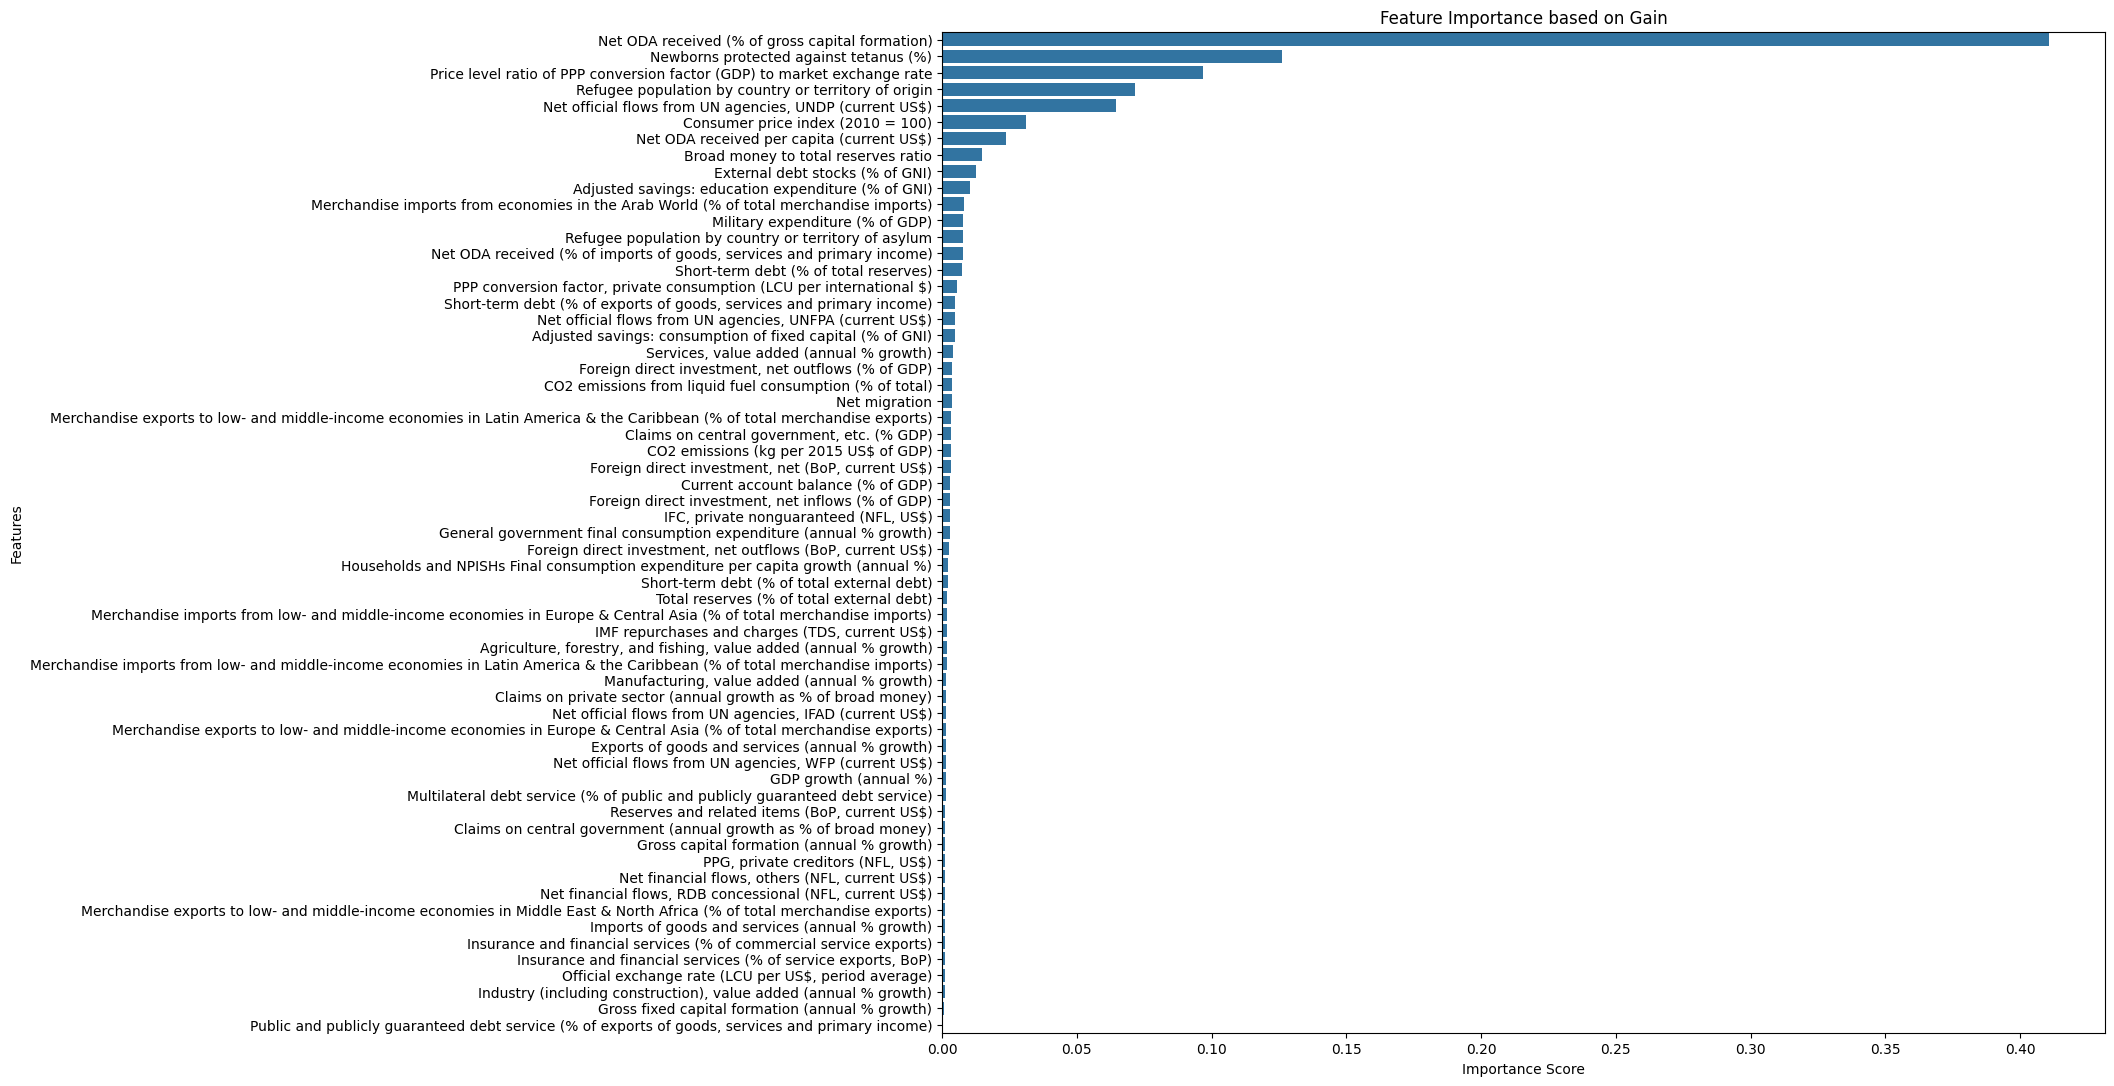

In [ ]:
# Calculate feature importances
feature_importances = best_rf_model.feature_importances_
features = X_train.columns
feature_importance_df_gdp = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df_gdp = feature_importance_df_gdp.sort_values(by='Importance', ascending=False)

print(len(feature_importance_df_gdp))
display(feature_importance_df_gdp)

plt.figure(figsize=(15, 13))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df_gdp)
plt.title('Feature Importance based on Gain')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
feature_importance_df_gdp_filtered = feature_importance_df_gdp[feature_importance_df_gdp['Importance'] > 0.0055]

print(len(feature_importance_df_gdp_filtered))
display(feature_importance_df_gdp_filtered)

16


,Feature,Importance
37,Net ODA received (% of gross capital formation),0.410803
47,Newborns protected against tetanus (%),0.125916
51,Price level ratio of PPP conversion factor (GD...,0.096714
54,Refugee population by country or territory of ...,0.071445
44,"Net official flows from UN agencies, UNDP (cur...",0.064519
9,Consumer price index (2010 = 100),0.031162
39,Net ODA received per capita (current US$),0.023543
3,Broad money to total reserves ratio,0.014660
12,External debt stocks (% of GNI),0.012664
1,Adjusted savings: education expenditure (% of ...,0.010286


# Modeling - Life Expectancy


In [ ]:
df_7 = df_5.copy()

In [ ]:
# Drop features related to the target variable (life expectancy)
df_7 = df_7.drop(columns=['Life expectancy at birth, female (years)',
                          'Life expectancy at birth, male (years)',
                          'GDP per capita growth (annual %)',
                          'GDP per capita (constant 2015 US$)',
                          'GDP per capita (constant LCU)',
                          'GDP per capita (current LCU)',
                          'GDP per capita, PPP (constant 2017 international $)',
                          'GDP per capita, PPP (current international $)',
                          'GDP per capita (current US$)'])

In [ ]:
# Split predictors and target variable
X = df_7.drop('Life expectancy at birth, total (years)', axis=1)
y = df_7['Life expectancy at birth, total (years)']

# Split and Normalize the data

In [ ]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_filtered_data, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((1459, 61), (365, 61), (1459,), (365,))

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

display(X_train_scaled_df)

,Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: education expenditure (% of GNI),"Agriculture, forestry, and fishing, value added (annual % growth)",Broad money to total reserves ratio,CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions from liquid fuel consumption (% of total),Claims on central government (annual growth as % of broad money),"Claims on central government, etc. (% GDP)",Claims on private sector (annual growth as % of broad money),Consumer price index (2010 = 100),...,Price level ratio of PPP conversion factor (GDP) to market exchange rate,"Public and publicly guaranteed debt service (% of exports of goods, services and primary income)",Refugee population by country or territory of asylum,Refugee population by country or territory of origin,"Reserves and related items (BoP, current US$)","Services, value added (annual % growth)","Short-term debt (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Short-term debt (% of total reserves),Total reserves (% of total external debt)
0,0.568125,-0.220186,0.169517,-0.135288,-0.613444,0.026350,-0.121541,-0.345696,0.073473,-0.122191,...,-0.935550,-0.443352,2.921825,-0.445219,0.431438,0.478825,-0.034579,0.051685,-0.125851,-0.235081
1,-0.399011,-0.632231,0.613573,0.345161,-0.337537,0.785300,-0.032581,5.026477,-0.289604,0.035998,...,-1.312727,0.003175,-0.544191,0.359675,0.018700,0.000282,-0.011554,-0.779625,-0.124152,-0.405073
2,-0.184856,-0.299426,-0.131456,-0.131146,-0.004615,0.222536,-0.269090,0.006059,-0.044815,-0.183299,...,-0.007957,0.547530,2.611846,-0.447607,0.074761,-0.223940,-0.167586,-0.627181,-0.126511,-0.330733
3,0.974888,-0.061708,-0.119008,-0.136984,-0.889575,0.631797,-0.071231,-0.212414,0.332401,-0.172569,...,-0.185576,1.573816,0.799769,0.485535,0.050037,0.000282,-0.193206,-0.873650,-0.127748,-0.292742
4,-0.694137,-0.486204,0.190767,-0.086695,-0.665129,0.798717,-0.099960,-0.218184,-0.159720,-0.097682,...,-0.247318,-0.631293,0.351651,1.299376,0.084208,0.332456,0.086063,2.545898,-0.103169,-0.369578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.183555,0.121190,0.041901,-0.117133,-0.665378,-0.104217,0.433605,0.006571,0.984660,-0.090746,...,0.054881,-0.573327,-0.546454,-0.447198,-0.059108,0.719403,-0.206956,-0.109925,-0.126508,-0.200482
1455,1.122703,-0.367758,0.499232,-0.132483,-0.596060,-0.437704,-0.107158,-0.018690,0.141454,-0.068145,...,0.761401,-0.766501,-0.336631,-0.446652,0.115877,0.239655,-0.222869,0.126598,-0.127043,-0.008568
1456,-1.413116,0.013004,-0.317224,-0.000671,0.126204,-0.624665,-0.138869,-0.304462,-0.368851,-0.097434,...,-0.771045,-0.787893,-0.505348,-0.404120,0.047457,-1.555529,-0.031216,0.324128,0.000049,0.021774
1457,-0.237242,0.225004,-0.126941,-0.130329,-0.190374,0.037452,-0.104467,0.091519,0.268946,0.015627,...,-0.661195,-0.375165,-0.479487,-0.351945,-0.052801,-0.216889,-0.136702,0.757078,-0.125246,-0.172719


# Random Forest - Life Expectancy

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor object
random_forest_regressor = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object with cross-validation
grid_search_rf = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search_rf.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
# Create a RandomForestRegressor model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# best_rf_model = RandomForestRegressor(
#                                 max_depth = 20, 
#                                 min_samples_leaf = 1, 
#                                 min_samples_split = 2, 
#                                 n_estimators = 200, 
#                                 random_state=42)

# Fit the best model to the training data
best_rf_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred_rf = best_rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print('Mean Squared Error:', mse_rf)
print('Mean Absolute Error:', mae_rf)
print('Root Mean Squared Error:', rmse_rf)

Mean Squared Error: 9.789181068840898
Mean Absolute Error: 2.069769252798016
Root Mean Squared Error: 3.128766700928802


# Feature Importance - Life Expectancy

61


,Feature,Importance
47,Newborns protected against tetanus (%),0.227000
39,Net ODA received per capita (current US$),0.112981
37,Net ODA received (% of gross capital formation),0.098636
32,Merchandise imports from economies in the Arab...,0.078475
9,Consumer price index (2010 = 100),0.039904
...,...,...
2,"Agriculture, forestry, and fishing, value adde...",0.001878
16,"Foreign direct investment, net outflows (BoP, ...",0.001791
24,Imports of goods and services (annual % growth),0.001480
22,"IFC, private nonguaranteed (NFL, US$)",0.001409


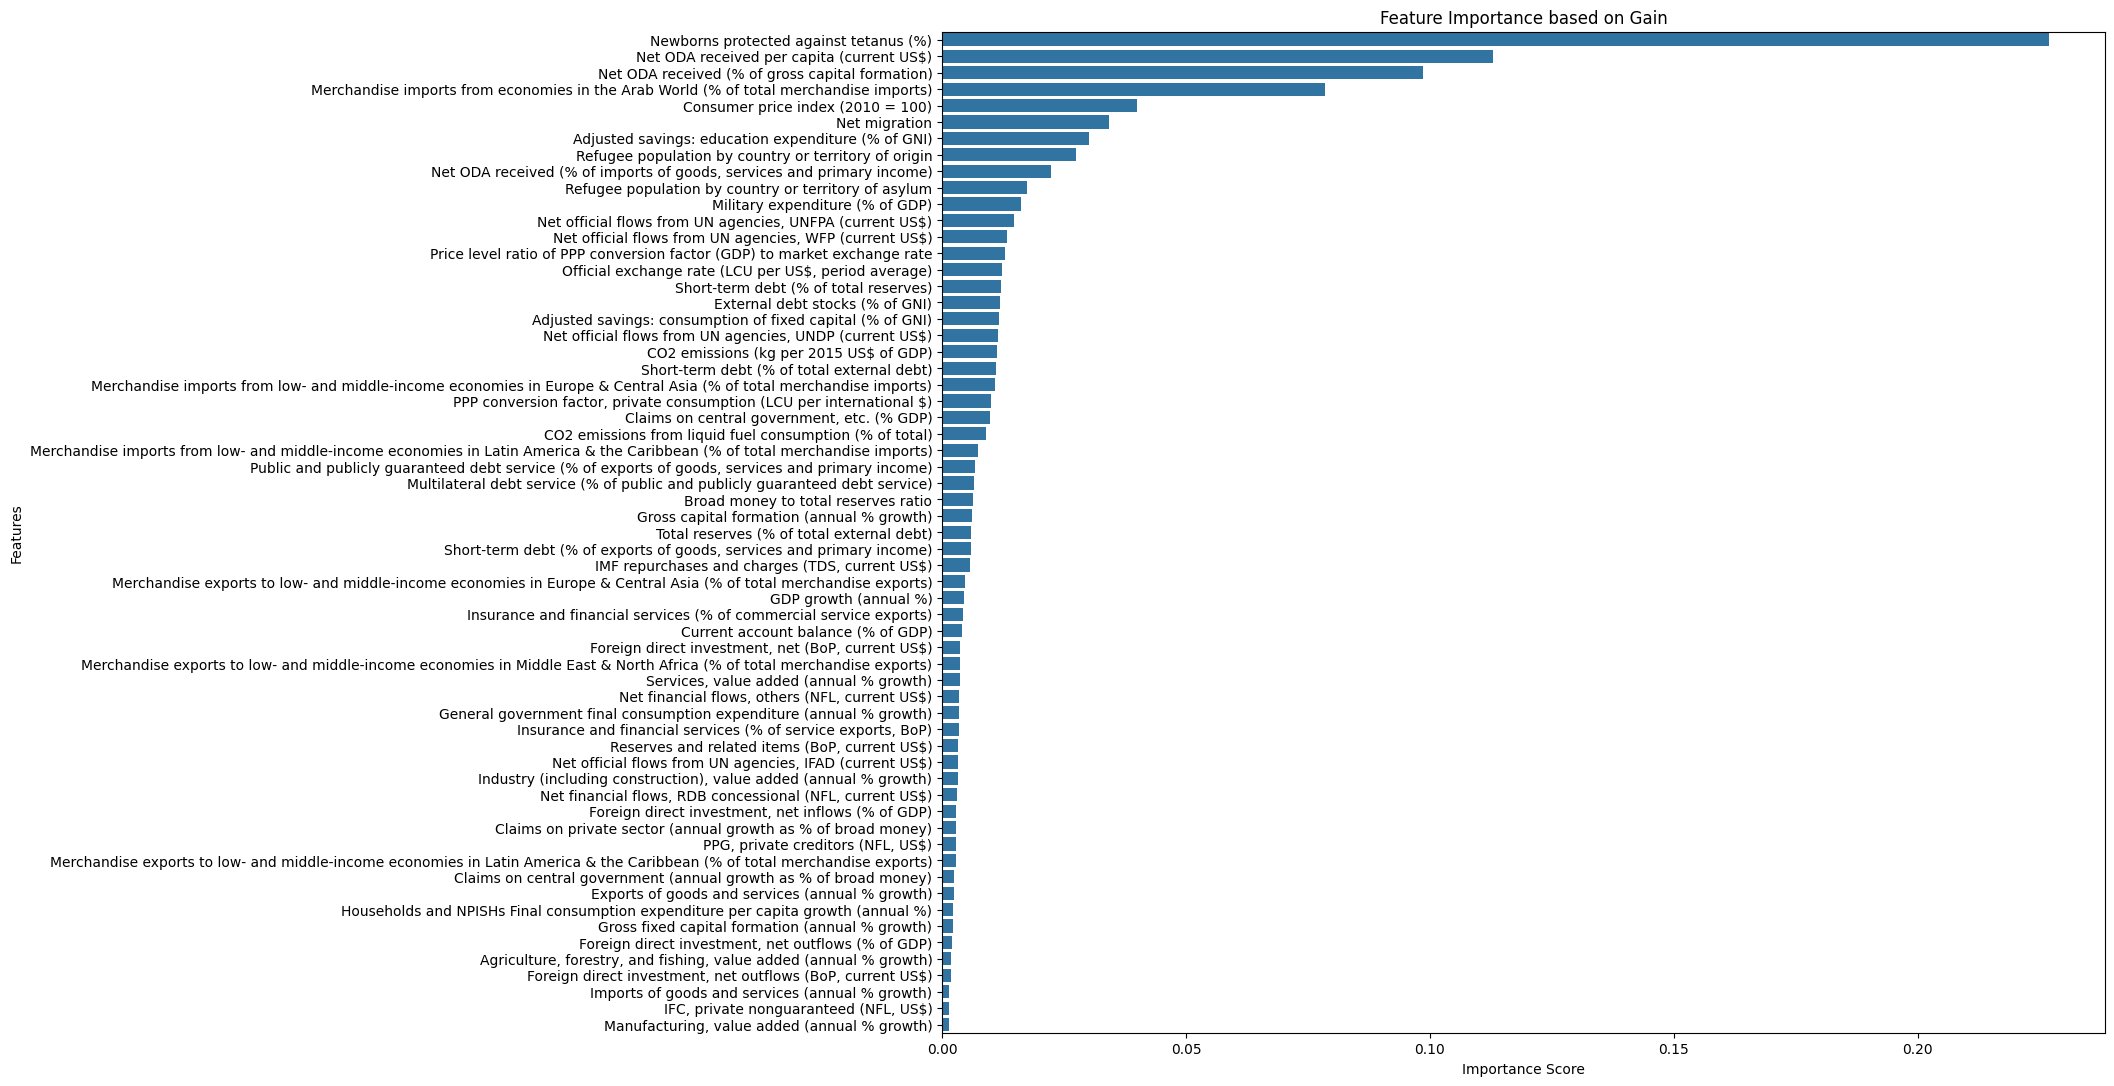

In [ ]:
# Calculate feature importances
feature_importances = best_rf_model.feature_importances_

# Create a pandas dataframe with feature names and their importance scores
features = X_train.columns
feature_importance_df_life = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df_life = feature_importance_df_life.sort_values(by='Importance', ascending=False)

print(len(feature_importance_df_life))
display(feature_importance_df_life)

plt.figure(figsize=(15, 13))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df_life)
plt.title('Feature Importance based on Gain')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
feature_importance_df_life_filtered = feature_importance_df_life[feature_importance_df_life['Importance'] > 0.0055]

print(len(feature_importance_df_life_filtered))
display(feature_importance_df_life_filtered)

33


,Feature,Importance
47,Newborns protected against tetanus (%),0.227000
39,Net ODA received per capita (current US$),0.112981
37,Net ODA received (% of gross capital formation),0.098636
32,Merchandise imports from economies in the Arab...,0.078475
9,Consumer price index (2010 = 100),0.039904
42,Net migration,0.034175
1,Adjusted savings: education expenditure (% of ...,0.030042
54,Refugee population by country or territory of ...,0.027451
38,"Net ODA received (% of imports of goods, servi...",0.022248
53,Refugee population by country or territory of ...,0.017470


# Get overlapping features

In [ ]:
display(df_5[['Life expectancy at birth, total (years)', 'GDP per capita (current US$)']])

,"Life expectancy at birth, total (years)",GDP per capita (current US$)
0,42.648000,757.632389
1,50.374000,236.610586
2,62.626000,978.993257
3,48.949000,194.567891
4,48.541000,232.411825
...,...,...
1819,55.732343,1192.403809
1820,55.732343,918.376756
1821,55.732343,964.224385
1822,55.732343,1487.907764


In [ ]:
features_gdp = set(feature_importance_df_gdp_filtered['Feature'])
features_life = set(feature_importance_df_life_filtered['Feature'])

# Finding the overlapping features
overlapping_features = features_gdp.intersection(features_life)

specific_columns = {'Life expectancy at birth, total (years)', 'GDP per capita (current US$)'}
overlapping_features_with_specifics = overlapping_features.union(specific_columns)
overlapping_features_with_specifics_list = list(overlapping_features_with_specifics)

# Filtering df_5 for overlapping features
selected_features_df_5 = df_5[overlapping_features_with_specifics_list]

In [ ]:
print(len(selected_features_df_5))
display(selected_features_df_5)

1824


,Net ODA received (% of gross capital formation),External debt stocks (% of GNI),Military expenditure (% of GDP),Broad money to total reserves ratio,Net ODA received per capita (current US$),Price level ratio of PPP conversion factor (GDP) to market exchange rate,"Net official flows from UN agencies, UNDP (current US$)","PPP conversion factor, private consumption (LCU per international $)",Newborns protected against tetanus (%),"Life expectancy at birth, total (years)","Net ODA received (% of imports of goods, services and primary income)",Adjusted savings: education expenditure (% of GNI),Refugee population by country or territory of origin,Merchandise imports from economies in the Arab World (% of total merchandise imports),Refugee population by country or territory of asylum,Short-term debt (% of total reserves),GDP per capita (current US$),Consumer price index (2010 = 100)
0,59.514022,75.456965,0.000017,18.963487,9.075663,0.415397,4.270000e+06,201.613441,19.000000,42.648000,4.011081,4.800000,317392.000000,0.001543,91520.0,2485.177929,757.632389,201.176115
1,100.453065,88.136240,1.304932,18.963487,21.248761,0.415397,5.350000e+06,201.613441,69.061273,50.374000,19.882322,3.299570,107993.417488,0.271702,3700.0,2485.177929,236.610586,201.176115
2,37.302323,33.944510,2.184731,0.386330,83.972659,0.415397,2.420000e+06,201.613441,39.000000,62.626000,11.375191,5.100000,107993.417488,7.219051,5680.0,0.263731,978.993257,9.993718
3,52.894912,33.042619,1.836525,18.963487,23.622714,0.415397,7.800000e+06,201.613441,8.000000,48.949000,28.869246,1.700000,90.000000,1.851116,90.0,2485.177929,194.567891,50.251202
4,86.047618,40.216946,2.751173,4.685682,27.720157,0.415397,6.540000e+06,201.613441,21.000000,48.541000,52.979401,2.300000,199810.000000,0.723748,267440.0,89.982026,232.411825,7.711640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,59.514022,75.456965,1.092190,18.963487,67.243067,0.385033,5.007146e+06,756.402031,69.061273,55.732343,28.869246,3.615221,786.000000,7.219051,206229.0,2485.177929,1192.403809,209.475524
1820,59.514022,75.456965,5.441923,18.963487,67.243067,0.352148,5.007146e+06,240.082948,69.061273,55.732343,28.869246,3.615221,7853.000000,7.219051,9300.0,2485.177929,918.376756,129.610337
1821,59.514022,75.456965,2.060079,18.963487,67.243067,0.357940,5.007146e+06,1221.988420,69.061273,55.732343,28.869246,3.615221,7510.000000,7.219051,1463523.0,2485.177929,964.224385,199.268589
1822,59.514022,75.456965,1.186304,2.665921,67.243067,0.382072,5.007146e+06,6.506187,69.061273,55.732343,28.869246,3.615221,295.000000,7.219051,61159.0,2485.177929,1487.907764,332.778677
